# Introduction
This notebook focuses on the modeling instead of visualization.

In [1]:
import sys
sys.path.insert(0,'/mnt/ivy/thliao/project/ML_oxygen/scripts/')
from load_data import *
from general_func import *
import xgboost as xgb

import shap
shap.initjs()
%pylab inline
from IPython.display import Image

8945
8943
(9328, 10054)
Counter({'aerobic': 3767, 'anaerobic': 1714, 'obligate aerobic': 1627, 'facultative': 953, 'microaerophilic': 726, 'obligate anaerobic': 156})


Populating the interactive namespace from numpy and matplotlib


# Preprocessing and sampling data

In [4]:
reduced_data = pd.read_csv('/mnt/ivy/thliao/project/ML_oxygen/training_sets/processed_data/CBdist_based_filter/keggbin_reduced.tsv',sep='\t',index_col=0)

# Accessory functions

In [2]:
def wpl(X_test, y_pred_label,y_test):
    # get wrongly_predicted_labels
    return [gid 
            for gid,_1,_2 in zip(X_test.index, y_pred_label,y_test) 
            if _1!=_2]

# Machine learning strategy


First, the label of each genome belongs to multi-classes, which is hard to be implemented. Thus, we need to split it into some smaller and easier problems and benchmark their advantanges and disadvantages.

**The performance of each model**

To each model, optimize it in identical parameter sets


## filterout low completeness

## define model validation
Each function return as follow:

predicted probability, predicted labels, model, AUC, accuracy

see extra ipynb [Model_eval_opti.ipynb](./confoundingfactors/Model_eval_opti.ipynb)

---

# Simulation

number within the bracket represent the number of parameters

Below strategy could verify the relatively effectiveness of the key genes. But can't not identify those as the most effective sets. 

1. directly drop some genes (one)
2. Mask some genes within some genomes (two)
3. Same as **1** but add back the key genes/ add the same number of random selected genes after dropping (one)
4. Same as **2** but add back the key genes (two)

## Genome incompleteness

Randomly mask (make it become 0) particular ratio of genes within particular ratio of genomes. 
See how the genome incompleteness affect the final results.

see the extra notebook [genome_incompleteness.ipynb](./workflow/genome_incompleteness.ipynb)

## Backward-selection stategy

see the extra notebook [backwardselection](Model_interpretation/backward_selection.ipynb)

## varyied performance of each taxa

see [taxon_specific.ipynb](./workflow/taxon_specific.ipynb)

### Taxon-specific genes

see [taxon_specific.ipynb](./workflow/taxon_specific.ipynb)

# comparisons between datasets using different features

## genomic signature and KEGG

more can be viewed at [feature_compare.ipynb](./dataset_prepare/taxon_specific.ipynb)

In [7]:
for key,inpath in datasets_list.items():    
    in_df = pd.read_csv(inpath, sep="\t", index_col=0)
    bac_in_df = in_df.reindex(bac_ids).fillna(0)
    X = bac_in_df
    print(key, X.shape)

Module (8943, 388)
Reaction (8943, 6471)
Pathway (8943, 453)
KEGG bin (8943, 10054)
KEGG num (8943, 10054)
Pfam bin (8943, 11011)
Pfam num (8943, 11011)
Codon (8943, 64)
Tetra (8943, 136)


In [35]:
redo = False
acc_p = 'training_sets/outputs/Dataset_comparison_acc.tab'
auc_p = 'training_sets/outputs/Dataset_comparison_auc.tab'
if not exists(acc_p) or redo:
    acc_d = {}
    auc_d = {}
    for key,path in datasets_list.items():
        tqdm.write(key)
        acc_list,auc_list = assess_data(path)
        acc_d[key] = acc_list
        auc_d[key] = auc_list
    acc_df = pd.DataFrame.from_dict(acc_d,orient='index')
    acc_df = acc_df.T
    acc_df.to_csv(acc_p,index=1)
    auc_df = pd.DataFrame.from_dict(auc_d,orient='index')
    auc_df = auc_df.T    
    auc_df.to_csv(auc_p,index=1)
else:
    acc_df = pd.read_csv(acc_p,index_col=0)
    auc_df = pd.read_csv(auc_p,index_col=0)

Module


100%|██████████| 50/50 [04:48<00:00,  5.76s/it]


Reaction


100%|██████████| 50/50 [06:18<00:00,  7.57s/it]


Pathway


100%|██████████| 50/50 [03:37<00:00,  4.35s/it]


KEGG bin


100%|██████████| 50/50 [08:42<00:00, 10.46s/it]


KEGG num


100%|██████████| 50/50 [08:55<00:00, 10.71s/it]


Pfam bin


100%|██████████| 50/50 [08:04<00:00,  9.69s/it]


Pfam num


100%|██████████| 50/50 [07:23<00:00,  8.86s/it]


Codon


100%|██████████| 50/50 [03:25<00:00,  4.11s/it]


Tetra


100%|██████████| 50/50 [03:28<00:00,  4.17s/it]


## KEGG with prior knowledge

see [feature_recoding.ipynb](./workflow/feature_recoding.ipynb)

# visualize the target genes for dating

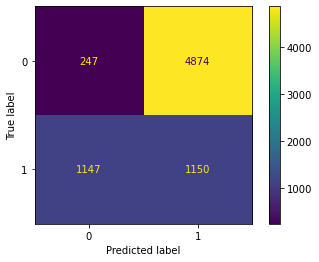

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

x = ko_df[k]
y = [genome2oxy_bin[_] for _ in ko_df.index]
cm = confusion_matrix(x, y)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [81]:
gene_set1 = pd.read_csv('./tmap_analysis/top20.tsv',sep='\t',index_col=0)
gene_set2 = pd.read_excel('./presence.xlsx',index_col=0)

from ete3 import Tree
order_gids = Tree('./trees/fasttree/validate_genomes_20p_rerooted.newick').get_leaf_names()
order_gids = [_ for _ in order_gids if _ in bac_ids]

target_ko = list(gene_set1.index) + list(gene_set2.index)


ko_df = kegg_bin_df.reindex(order_gids).reindex(columns=target_ko)
ko_df.loc[:, 'aerobe'] = [genome2oxy_bin[_] for _ in ko_df.index]
ko_df.loc[:, 'anaerobe'] = [1-genome2oxy_bin[_] for _ in ko_df.index]
z_df = ko_df.copy()

## heatmap

In [5]:
from bin.other_convertor.classify_kos import get_ko_infos


target_ko = open('/mnt/ivy/thliao/project/ML_oxygen/training_sets/processed_data/CBdist_based_filter/top120.txt').read().strip().split('\n')

ko2p = {}
ko2coef = {}
for ko in tqdm(target_ko):
    if not ko.startswith('K'):
        continue
    coef,p = pearsonr(reduced_data[ko],y_bin)
    if str(p)!='nan':
        ko2p[ko] = p
        ko2coef[ko] = coef

from statsmodels.stats.multitest import multipletests
ko2q = dict(zip([k for k,v in ko2p.items()],
                multipletests([v for k,v in ko2p.items()],method='fdr_bh')[1]))

ordered_120 = list(sorted(target_ko,key=lambda x:ko2coef[x]))

_df = pd.DataFrame(index=target_ko)
ko2n = get_ko_infos(target_ko)
# for _ in target_ko:
#     print(ko2n[_])
_df.loc[:,'description'] = [ko2n[_] for _ in target_ko]
_df.loc[:,'pearsonr coef'] = [ko2coef[_] for _ in target_ko]
_df.loc[:,'pearsonr q-value'] = [ko2q[_] for _ in target_ko]

#_df.to_excel('./tmp.xlsx')

100%|██████████| 120/120 [00:00<00:00, 2230.29it/s]


In [88]:
shap_df = pd.read_csv(f"/mnt/ivy/thliao/project/ML_oxygen/training_sets/processed_data/CBdist_based_filter/forward_selection_GBDT_SHAP/120_fulldf.tsv",sep='\t',index_col=0)
shap_df

shap_df.mean(1)[:-2]

shap_df = pd.read_csv("/mnt/ivy/thliao/project/ML_oxygen/training_sets/processed_data/CBdist_based_filter/GBDT120_SHAP.tsv",sep='\t',index_col=0)
shap_df = shap_df.T
shap_dist = pdist(shap_df.values,)

shap_df.loc[ordered_120[:5],"GCA_900130005.1"]

reduced_data.loc["GCA_900130005.1",ordered_120[:5]]

from scipy.spatial.distance  import pdist,squareform
shap_dist_df = pd.DataFrame(squareform(shap_dist),index=shap_df.index,columns=shap_df.index)
shap_dist_df.loc[ordered_120[:6],ordered_120[:6]]

from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from scipy.spatial.distance  import pdist
Z = hierarchy.linkage(shap_dist, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z)
ordered_120 = shap_df.index[dn['leaves']]

for _ in ordered_120:
    print(_,ko2coef[_])

In [9]:
_df.to_excel('./tmp.xlsx')

In [118]:
from ete3 import Tree
order_gids = Tree('training_sets/trees/fasttree/validate_genomes_20p_rerooted.newick').get_leaf_names()
order_gids = [_ for _ in order_gids if _ in bac_ids]    
ordered_120 = list(sorted(target_ko,key=lambda x:ko2coef[x]))
ko_df = reduced_data.reindex(order_gids,columns=ordered_120)
ko_df.loc[:, 'aerobe'] = [genome2oxy_bin[_] for _ in ko_df.index]
ko_df.loc[:, 'anaerobe'] = [1-genome2oxy_bin[_] for _ in ko_df.index]
z_df = ko_df.copy()

for col in [_ for _ in z_df.columns if _.startswith('K')]:
    z_df.loc[(z_df.loc[:, ['aerobe', col]] == 1).all(1), col] = 0.25
    z_df.loc[(z_df.loc[:, ['anaerobe', col]] == 1).all(1), col] = 0.75
    
z_df['aerobe'] = z_df['aerobe'].replace(1, 0.25)
z_df['anaerobe'] = z_df['anaerobe'].replace(1, 0.75)
names = []
ko2name = get_ko_infos(target_ko)
for _ in z_df.columns:
#     if _ in info2style:
#         names.append(info2style[_]['info'] + f' ({_})')
#     else:
    names.append(ko2name.get(_, _).split(' ')[0].strip(';') + f' ({_})')
        

gid2taxon = sub_NCBI_df['phylum'].to_dict()

fig = go.Figure(data=go.Heatmap(
    z=z_df.values,
    colorscale=[[0, "#f7f7ce"],
                [.25, "#ff474c"],
                [.75, "#2E7D32"],
                [1, "#88cfea"], ],
    showscale=False,
    x=names+['aerobe','anaerobe'],
    #y=list(z_df.index),
    text=[[str(gid2taxon.get(_, ''))+' ' + _]*17 for _ in z_df.index],

))

tax_map = {'Proteobacteria':"#636efa",
 'Firmicutes':"#ab63fa",
 'Actinobacteria':"#ef553b",
 'Bacteroidetes':"#ffa15a",
 "others":"#00cc96"
 }


for g in ko_df.index:
    t = gid2taxon.get(g, '')
    fig.add_bar(x=['tax'], y=[1],
                marker={'color': tax_map.get(t, '#000000'),
                       'line':{'width':0}},
                #text=t,
                showlegend=False)

fig.update_layout(barmode='stack',
                  #                   template='simple_white'
                  )
fig.layout.yaxis.visible = False
fig.update_xaxes(type='category')
fig.layout.height = 600
fig.layout.width = 1300
fig.layout.font.size = 15
fig.layout.xaxis.tickangle = 45
# fig.show()

from IPython.display import Image
fig.layout.height = 800
fig.layout.width = 1200
fig.layout.paper_bgcolor='#ffffff'
fig.layout.plot_bgcolor='#ffffff'
# fig.show()
# fig.write_image('./p.pdf',engine='orca')

# img_bytes1 = 
Image(fig.to_image(format="png",scale=1))
fig.write_html('/mnt/ivy/thliao/project/ML_oxygen/selected120_heatmap.html')

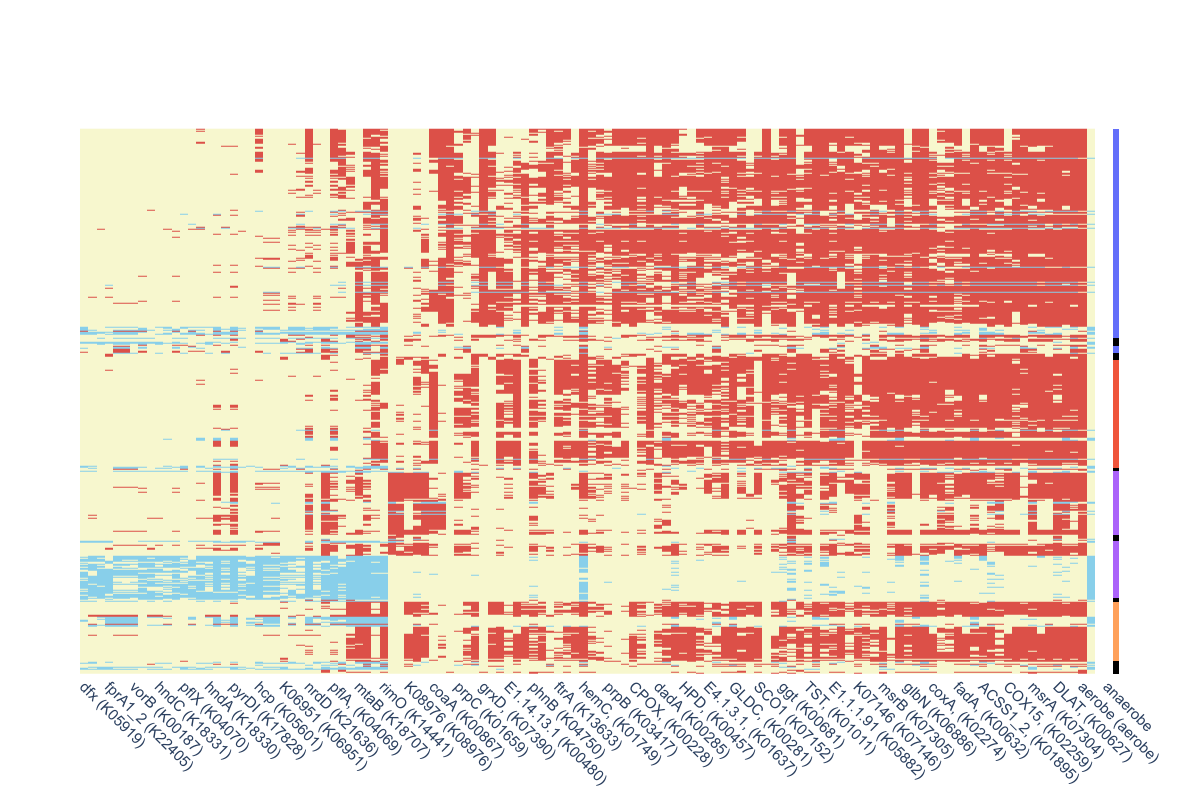

In [119]:
Image(fig.to_image(format="png",scale=1))

# tmap

In [251]:
my_dist = pd.read_csv(f"/home-user/thliao/project/ML_oxygen/pairwise_distance/kegg_MDS_cityblock.tab",
                      sep="\t", index_col=0)

In [313]:
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tmap.tda import Filter, mapper
from tmap.tda.cover import Cover
from tmap.tda.metric import Metric

train_ids = list(X_train.index)

# Step1. initiate a Mapper
tm = mapper.Mapper(verbose=1)
# Step2. Projection
#lens = [Filter.MDS(components=[0, 1], metric=Metric("precomputed"))]
projected_X = pd.read_csv(f"/home-user/thliao/project/ML_oxygen/pairwise_distance/kegg_MDS_cityblock.tab",
                      sep="\t", index_col=0)
projected_X = projected_X.reindex(train_ids)
tm.filter(data=projected_X,lens=[])
dist_df = kegg_cb_dist_df.reindex(train_ids,columns=train_ids)

Filtering has been completed.


In [291]:
from tmap.tda.utils import optimize_dbscan_eps
eps = optimize_dbscan_eps('', threshold=90,dm=dist_df)
print(eps)

693.9000000000005


In [ ]:
clusterer = DBSCAN(eps=650, min_samples=2,metric='precomputed')
cover = Cover(projected_data=projected_X.values, 
              resolution=20, 
              overlap=0.95)
graph = tm.map(data=dist_df, cover=cover, clusterer=clusterer)

In [534]:
graph.write('./tmap_analysis/kegg_cb_dist.graph')

with open("./tmap_analysis/kegg_cb_dist.ginfo",'w') as f1:
    f1.write(graph.info())

## SAFE score calculations

In [333]:
from tmap.netx.SAFE import SAFE_batch, get_SAFE_summary
n_iter = 1000
enriched_scores = SAFE_batch(graph, 
                             metadata=X_train,
                             n_iter=n_iter, _mode='enrich',
                            num_thread=1)

100%|██████████| 1000/1000 [6:30:47<00:00, 23.45s/it] 


In [535]:
enriched_scores.to_csv('./tmap_analysis/kegg_cb_dist.safe',sep='\t',index=1)

In [568]:
print(len(enriched_scores.columns))
print(X_train.shape)

12142
(5942, 12140)


In [570]:
_df = X_train.copy()
_df.loc[:,'aerobic'] = y_train
_df.loc[:,'anaerobic'] = 1-y_train
safe_summary = get_SAFE_summary(graph=graph,
                            metadata=_df,
                            safe_scores=enriched_scores,
                            n_iter=1000,
                            p_value=0.05)

In [436]:
a_enriched_scores = SAFE_batch(graph, 
                             metadata=y_train,
                             n_iter=1000, 
                             _mode='enrich',
                            num_thread=1)

100%|██████████| 10000/10000 [09:08<00:00, 19.00it/s]

In [ ]:
img_bytes1,img_bytes2 = get_fig(pd.DataFrame(y_train.reshape(-1,1),columns=['aerobic']),enriched_scores,'aerobic')

## SAFE scores ranking

In [ ]:
from plotly import tools
import plotly.graph_objs as go
import plotly

fig = tools.make_subplots(1, 1)

safe_summary_metadata = safe_summary.reindex(X_train.columns)
sorted_df = safe_summary_metadata.sort_values('SAFE enriched score', ascending=False)
_sorted_df = sorted_df.iloc[:20,:]
fig.append_trace(go.Bar(x=_sorted_df.loc[:, 'SAFE enriched score'],
                        y=_sorted_df.index,
                        marker=dict(line=dict(width=1)),
                        orientation='h',
                        showlegend=False), 1, 1)

fig.layout.yaxis.autorange = 'reversed'
fig.layout.margin.l = 200
fig.layout.height = 1000
fig.show()

In [536]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
nbrs = NearestNeighbors(algorithm='ball_tree').fit(enriched_scores.T)
distances, indices = nbrs.kneighbors(enriched_scores.T.loc['aerobic',:].values.reshape(1,-1),n_neighbors=10)
for _ in enriched_scores.columns[indices.reshape(-1)]:
    if _.startswith('K'):
        print(get_ko_infos(_))

{'K01772': 'hemH, FECH; protoporphyrin/coproporphyrin ferrochelatase [EC:4.99.1.1 4.99.1.9]'}
{'K00658': 'DLST, sucB; 2-oxoglutarate dehydrogenase E2 component (dihydrolipoamide succinyltransferase) [EC:2.3.1.61]'}
{'K01895': 'ACSS1_2, acs; acetyl-CoA synthetase [EC:6.2.1.1]'}
{'K01589': 'purK; 5-(carboxyamino)imidazole ribonucleotide synthase [EC:6.3.4.18]'}
{'K01702': 'LEU1; 3-isopropylmalate dehydratase [EC:4.2.1.33]'}
{'K07304': 'msrA; peptide-methionine (S)-S-oxide reductase [EC:1.8.4.11]'}
{'K02257': 'COX10, ctaB, cyoE; heme o synthase [EC:2.5.1.141]'}
{'K17100': 'DAS; dihydroxyacetone synthase [EC:2.2.1.3]'}
{'K01903': 'sucC; succinyl-CoA synthetase beta subunit [EC:6.2.1.5]'}


In [429]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(enriched_scores.T)
distances, indices = nbrs.kneighbors(enriched_scores.T.loc['anaerobic',:].values.reshape(1,-1),n_neighbors=10)
for _ in enriched_scores.columns[indices.reshape(-1)]:
    if _.startswith('K'):
        print(get_ko_infos(_))

{'K20203': 'sudB; sulfide dehydrogenase subunit beta [EC:1.8.1.19]'}
{'K05919': 'dfx; superoxide reductase [EC:1.15.1.2]'}
{'K07138': 'K07138; uncharacterized protein'}
{'K00533': 'E1.12.7.2L; ferredoxin hydrogenase large subunit [EC:1.12.7.2]'}
{'K04115': 'bcrD, badG; benzoyl-CoA reductase subunit D [EC:1.3.7.8]'}
{'K18331': 'hndC; NADP-reducing hydrogenase subunit HndC [EC:1.12.1.3]'}
{'K01678': 'E4.2.1.2AB, fumB; fumarate hydratase subunit beta [EC:4.2.1.2]'}
{'K18332': 'hndD; NADP-reducing hydrogenase subunit HndD [EC:1.12.1.3]'}
{'K20453': 'dmdB; dimethylmaleate hydratase small subunit [EC:4.2.1.85]'}


In [470]:
from scipy.spatial.distance import *
from scipy.stats import pearsonr
metrics_eval = defaultdict(dict)
for c in tqdm(enriched_scores.columns):
    if c !='aerobic':
        r1,r2 = list(enriched_scores[c]),list(enriched_scores['aerobic'])
        metrics_eval['r2_score'][c] = metrics.r2_score(r1,r2)
        #metrics_eval['jaccard'][c] = 1-jaccard(r1,r2)
        metrics_eval['pearsonr'][c] = pearsonr(r1,r2)[0]

100%|██████████| 12142/12142 [00:29<00:00, 405.22it/s]


In [548]:
for k in ['r2_score','pearsonr']:
    e = metrics_eval[k]
    se = {_1:_2 if str(_2)!='nan' else 0 for _1,_2 in e.items()}
    for _ in sorted(se,
                    key=lambda x:se[x])[::-1][:20]:
        print(k,se[_],get_ko_infos(_))

r2_score 0.5181752648325142 {'K02257': 'COX10, ctaB, cyoE; heme o synthase [EC:2.5.1.141]'}
r2_score 0.49671472629185254 {'K00658': 'DLST, sucB; 2-oxoglutarate dehydrogenase E2 component (dihydrolipoamide succinyltransferase) [EC:2.3.1.61]'}
r2_score 0.3810613720229601 {'K07304': 'msrA; peptide-methionine (S)-S-oxide reductase [EC:1.8.4.11]'}
r2_score 0.36593511727684935 {'K01589': 'purK; 5-(carboxyamino)imidazole ribonucleotide synthase [EC:6.3.4.18]'}
r2_score 0.32631983479843407 {'K00344': 'qor, CRYZ; NADPH:quinone reductase [EC:1.6.5.5]'}
r2_score 0.28488539963091464 {'K01679': 'E4.2.1.2B, fumC, FH; fumarate hydratase, class II [EC:4.2.1.2]'}
r2_score 0.2587371093232903 {'K01702': 'LEU1; 3-isopropylmalate dehydratase [EC:4.2.1.33]'}
r2_score 0.24305668009426973 {'K03801': 'lipB; lipoyl(octanoyl) transferase [EC:2.3.1.181]'}
r2_score 0.22835897337013156 {'K13628': 'iscA; iron-sulfur cluster assembly protein'}
r2_score 0.20582460686560122 {'K00254': 'DHODH, pyrD; dihydroorotate dehyd

## ordination based on SAFE

In [354]:
import plotly
from plotly import graph_objs as go
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


pca = PCA()
pca_result = pca.fit_transform(enriched_scores.T)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=pca_result[:, 0],
                       y=pca_result[:, 1],
                        mode='markers',
                         text=enriched_scores.columns,
                        hoverinfo='text'),)

fig.add_trace(go.Scatter(x=pca_result[enriched_scores.columns=='aerobic', 0],
                       y=pca_result[enriched_scores.columns=='aerobic', 1],
                        mode='markers',
                         text=['aerobic'],
                        hoverinfo='text'),)
fig.layout.width = 700
fig.layout.height = 500
fig.show()


In [ ]:
from tmap.tda.plot import Color,vis_progressX
color = Color(target=y_train, dtype="numerical", target_by="sample")
fig = vis_progressX(graph, color=color, simple=True, mode="obj")
fig.layout.width = 700
fig.layout.height = 500
fig.show()

In [ ]:
color = Color(target=X_train['K02612'], dtype="numerical", target_by="sample")
fig = vis_progressX(graph, color=color, simple=True, mode="obj")
fig.layout.height = 700
fig.layout.width = 700
fig.show()


In [58]:
from plotly.tools import make_subplots
import matplotlib.pyplot as plt
from  matplotlib.pyplot import imread
import io
from IPython.display import Image
from IPython.display import display
def get_fig(X_train,SAFE_v,ko):
    color = Color(target=X_train[ko], dtype="numerical", target_by="sample")
    fig1 = vis_progressX(graph, color=color, simple=True, mode="obj")
    color = Color(target=SAFE_v[ko], dtype="numerical", target_by="node")
    fig2 = vis_progressX(graph, color=color, simple=True, mode="obj")    

    fig1.layout.width = 450
    fig1.layout.height = 400
    fig2.layout.width = 450
    fig2.layout.height = 400    
    img_bytes1 = fig1.to_image(format="png", engine="kaleido")
    img_bytes2 = fig2.to_image(format="png", engine="kaleido")

    f,ax = plt.subplots(1,2,figsize=(15,7))
    for i,b in enumerate([img_bytes1,img_bytes2]):
        imdata = imread(io.BytesIO(b))
        ax[i].imshow(imdata)
    plt.show()    

In [65]:
from tmap.tda.Graph import Graph
graph = Graph().read('./tmap_analysis/kegg_cb_dist.graph')

In [66]:
enriched_scores = pd.read_csv('./tmap_analysis/kegg_cb_dist.safe',sep='\t',index_col=0)